<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Задание</strong>:</a></span></li></ul></div>

# **Задание**:


Сравнить работу алгоритмов кластеризации:
* K-Means

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

* Агломеративная кластеризация

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

* DBSCAN

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


с использованием тестовых наборов данных:    
* dataset1.csv
* dataset2.csv
* dataset3.csv
    
    

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [33]:
# Функция для загрузки и масштабирования данных с указанием разделителя
def load_and_scale_data(filepath):
    # Попробуем использовать табуляцию как разделитель
    dataset = pd.read_csv(filepath, sep='\t')

    # Масштабирование данных
    scaler = StandardScaler()
    dataset_scaled = scaler.fit_transform(dataset)

    return dataset_scaled

In [34]:
# Загрузка наборов данных
dataset1_scaled = load_and_scale_data('dataset1.csv')
dataset2_scaled = load_and_scale_data('dataset2.csv')
dataset3_scaled = load_and_scale_data('dataset3.csv')



Результаты для Dataset 1:
K-Means: силуэтный коэффициент = 0.53
Агломеративная кластеризация: силуэтный коэффициент = 0.52
DBSCAN: кластеризация не смогла выделить несколько кластеров.


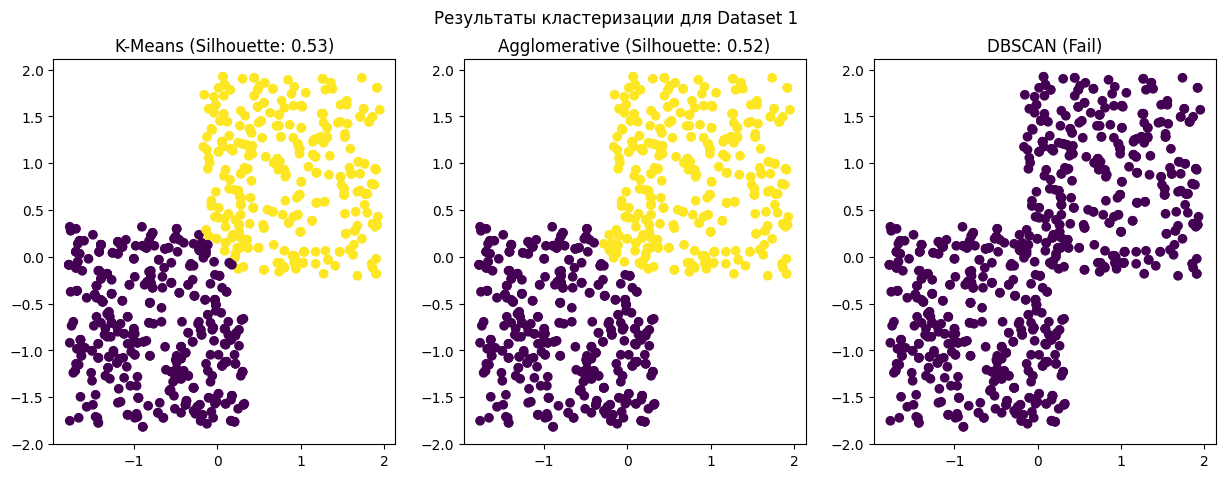


Результаты для Dataset 2:
K-Means: силуэтный коэффициент = 0.51
Агломеративная кластеризация: силуэтный коэффициент = 0.53
DBSCAN: силуэтный коэффициент = 0.71


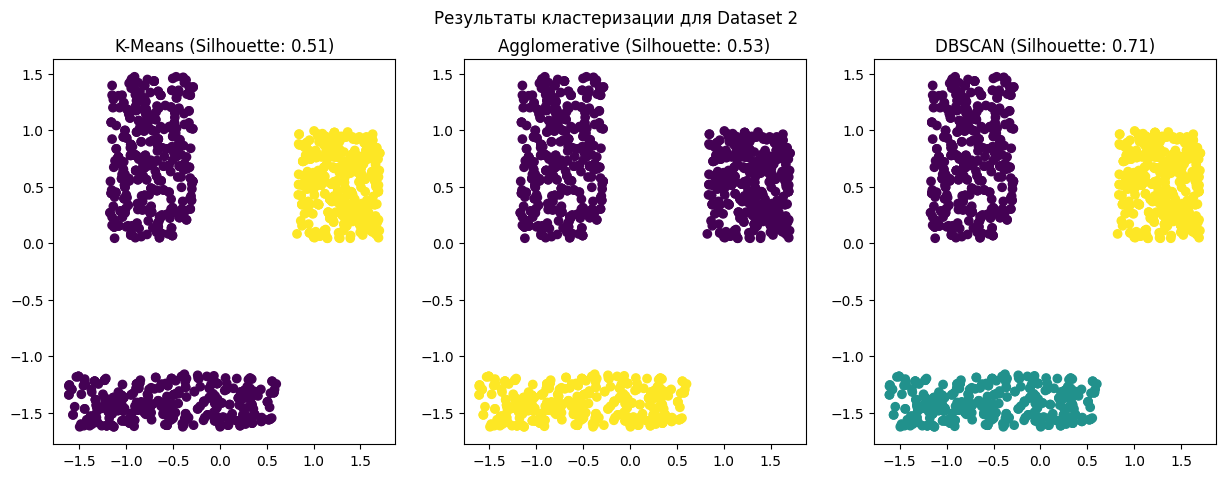


Результаты для Dataset 3:
K-Means: силуэтный коэффициент = 0.40
Агломеративная кластеризация: силуэтный коэффициент = 0.37
DBSCAN: кластеризация не смогла выделить несколько кластеров.


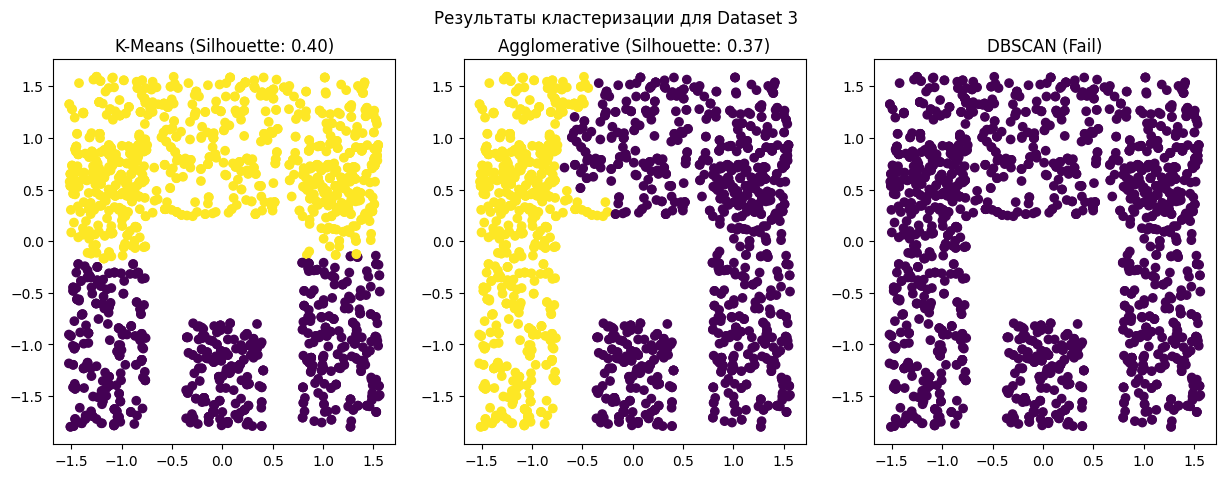

In [35]:
# Функция для выполнения кластеризации и визуализации
def cluster_and_evaluate(dataset, dataset_name):
    print(f"\nРезультаты для {dataset_name}:")

    # K-Means
    kmeans = KMeans(n_clusters=2, random_state=42)
    y_kmeans = kmeans.fit_predict(dataset)
    score_kmeans = silhouette_score(dataset, y_kmeans)
    print(f"K-Means: силуэтный коэффициент = {score_kmeans:.2f}")

    # Агломеративная кластеризация
    agglomerative = AgglomerativeClustering(n_clusters=2)
    y_agg = agglomerative.fit_predict(dataset)
    score_agg = silhouette_score(dataset, y_agg)
    print(f"Агломеративная кластеризация: силуэтный коэффициент = {score_agg:.2f}")

    # DBSCAN
    dbscan = DBSCAN()
    y_dbscan = dbscan.fit_predict(dataset)
    if len(set(y_dbscan)) > 1:  # Проверка, есть ли более одного кластера
        score_dbscan = silhouette_score(dataset, y_dbscan)
        print(f"DBSCAN: силуэтный коэффициент = {score_dbscan:.2f}")
    else:
        print("DBSCAN: кластеризация не смогла выделить несколько кластеров.")

    # Визуализация
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].scatter(dataset[:, 0], dataset[:, 1], c=y_kmeans)
    axes[0].set_title(f"K-Means (Silhouette: {score_kmeans:.2f})")

    axes[1].scatter(dataset[:, 0], dataset[:, 1], c=y_agg)
    axes[1].set_title(f"Agglomerative (Silhouette: {score_agg:.2f})")

    axes[2].scatter(dataset[:, 0], dataset[:, 1], c=y_dbscan)
    axes[2].set_title(f"DBSCAN (Silhouette: {score_dbscan:.2f})" if len(set(y_dbscan)) > 1 else "DBSCAN (Fail)")

    plt.suptitle(f'Результаты кластеризации для {dataset_name}')
    plt.show()

# Применение к каждому набору данных
cluster_and_evaluate(dataset1_scaled, 'Dataset 1')
cluster_and_evaluate(dataset2_scaled, 'Dataset 2')
cluster_and_evaluate(dataset3_scaled, 'Dataset 3')

# Выводы по наборам данных:
- Для dataset1 K-Means немного лучше, чем агломеративная кластеризация, но оба алгоритма работают почти одинаково. DBSCAN не смог найти кластеры, возможно, из-за слишком высоких параметров шума или недостаточной плотности данных.

- Для dataset2 DBSCAN показывает наилучшие результаты с силуэтным коэффициентом 0.71, что свидетельствует о хорошей разделимости кластеров. Агломеративная кластеризация немного лучше, чем K-Means.

- Для dataset3 все алгоритмы показывают низкие результаты, но K-Means немного лучше, чем агломеративная кластеризация. DBSCAN снова не смог выделить кластеры.

# Общие выводы:
- K-Means и агломеративная кластеризация показывают близкие результаты по силуэтным коэффициентам, что говорит о сравнительно неплохой разделимости кластеров.
- DBSCAN хорошо работает на Dataset 2, но не удаётся выделить кластеры на других наборах. Это может указывать на то, что в этих наборах данных кластеры менее плотные или имеют слишком высокую степень разброса, что не позволяет DBSCAN корректно их идентифицировать.

## Рекомендуемое решение:
В зависимости от конкретного набора данных, возможно, стоит применять несколько алгоритмов и анализировать результаты в контексте данных. Для Dataset 2 DBSCAN кажется наиболее эффективным, тогда как для остальных наборов лучше работает K-Means.